In [11]:
import pandas as pd

supply_chain_data = pd.read_csv(r"C:\Users\angel\Downloads\supply_chain_data.csv")

# Display options
# pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Set the display width for showing more characters
pd.set_option('display.max_colwidth', None)  # Show full width of columns


# Standardize column names by converting them to lowercase and replacing spaces with underscores
supply_chain_data.columns = supply_chain_data.columns.str.lower().str.replace(' ', '_')

# Create derived metrics
# Calculate profit margin
supply_chain_data['profit_margin'] = (
    supply_chain_data['revenue_generated'] - supply_chain_data['manufacturing_costs'] - supply_chain_data['shipping_costs']
)

# Calculate days to restock based on lead times and stock levels
supply_chain_data['days_to_restock'] = supply_chain_data['stock_levels'] / supply_chain_data['lead_times']

# Display the cleaned and prepared dataset
supply_chain_data.head()

,product_type,sku,price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,order_quantities,shipping_times,shipping_carriers,shipping_costs,supplier_name,location,lead_time,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs,profit_margin,days_to_restock
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075,8612.760341,8.285714
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579,7417.566722,1.766667
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282,9539.007127,0.100000
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159,7729.482116,1.769231
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632,2590.549443,1.666667


# profit margins

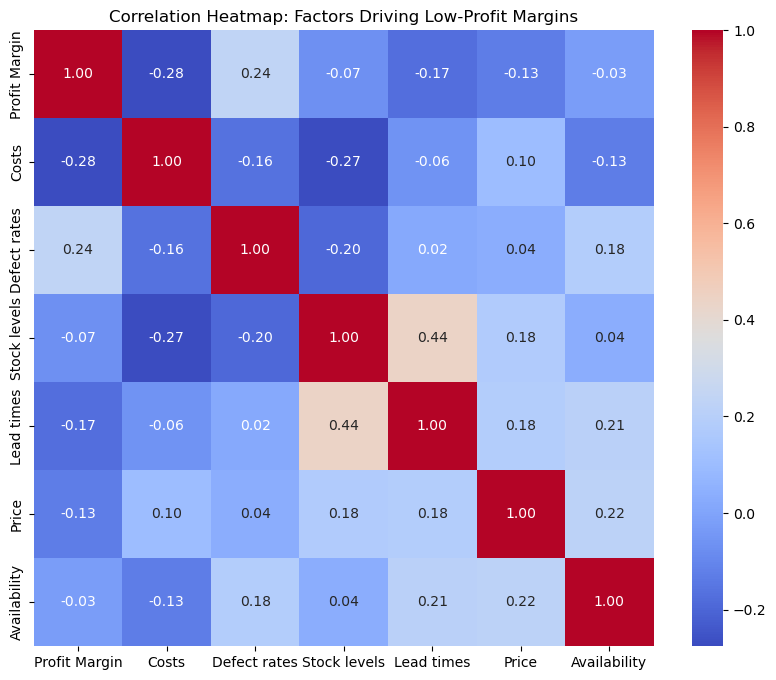

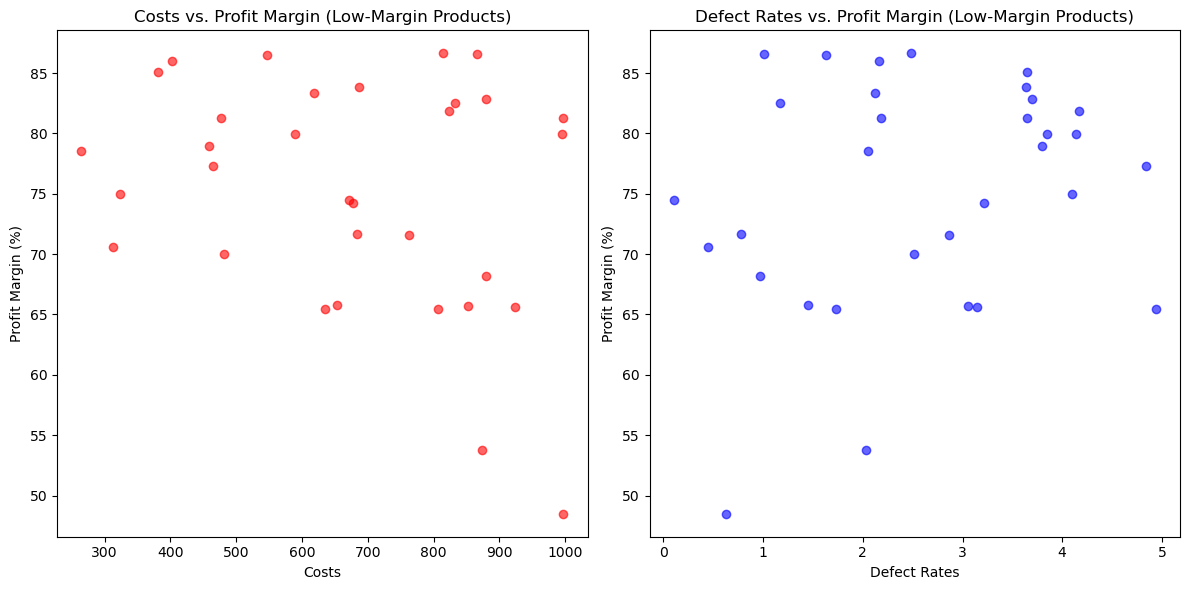

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
supply_chain_data = pd.read_csv(r"C:\Users\angel\Downloads\supply_chain_data.csv")

# Calculate Profit Margin for each row
supply_chain_data['Profit Margin'] = ((supply_chain_data['Revenue generated'] - supply_chain_data['Costs']) / 
                                      supply_chain_data['Revenue generated']) * 100

# Calculate the average profit margin for the entire dataset
average_profit_margin = supply_chain_data['Profit Margin'].mean()

# Filter for products or categories with low-profit margins
low_margin_products = supply_chain_data[supply_chain_data['Profit Margin'] < average_profit_margin]

# Analyze potential factors affecting low-profit margins
# We'll look at factors like Costs, Defect Rates, Stock Levels, Lead Times, etc.
# Calculate correlation matrix for low-margin products
correlation_matrix = low_margin_products[['Profit Margin', 'Costs', 'Defect rates', 'Stock levels', 'Lead times', 'Price', 'Availability']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Factors Driving Low-Profit Margins')
plt.show()

# Scatter plots to visualize relationships
plt.figure(figsize=(12, 6))

# Scatter plot for Costs vs. Profit Margin
plt.subplot(1, 2, 1)
plt.scatter(low_margin_products['Costs'], low_margin_products['Profit Margin'], alpha=0.6, color='red')
plt.title('Costs vs. Profit Margin (Low-Margin Products)')
plt.xlabel('Costs')
plt.ylabel('Profit Margin (%)')

# Scatter plot for Defect Rates vs. Profit Margin
plt.subplot(1, 2, 2)
plt.scatter(low_margin_products['Defect rates'], low_margin_products['Profit Margin'], alpha=0.6, color='blue')
plt.title('Defect Rates vs. Profit Margin (Low-Margin Products)')
plt.xlabel('Defect Rates')
plt.ylabel('Profit Margin (%)')

plt.tight_layout()
plt.show()


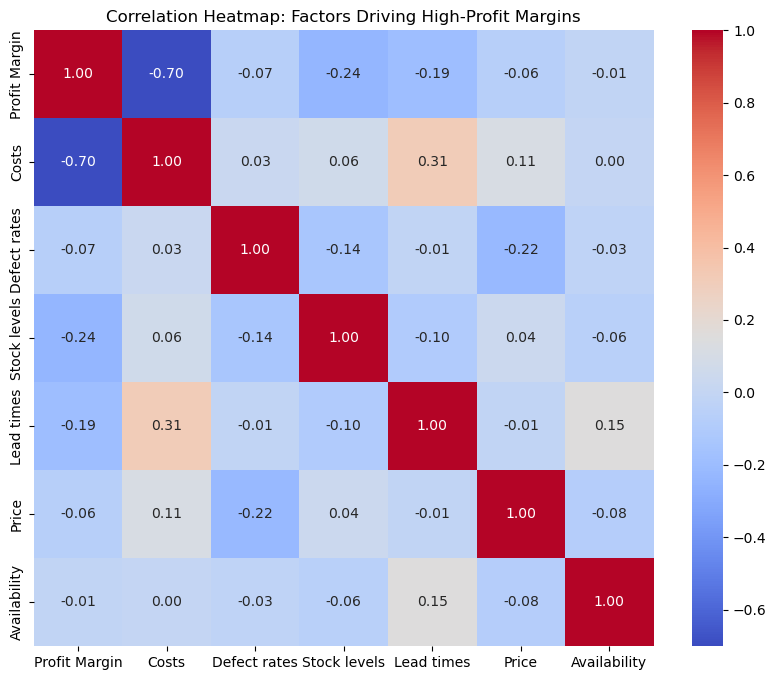

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
supply_chain_data = pd.read_csv(r"C:\Users\angel\Downloads\supply_chain_data.csv")

# Calculate Profit Margin for each row
supply_chain_data['Profit Margin'] = ((supply_chain_data['Revenue generated'] - supply_chain_data['Costs']) / 
                                      supply_chain_data['Revenue generated']) * 100

# Calculate the average profit margin for the entire dataset
average_profit_margin = supply_chain_data['Profit Margin'].mean()

# Filter for products or categories with high-profit margins
high_margin_products = supply_chain_data[supply_chain_data['Profit Margin'] > average_profit_margin]

# Analyze potential factors affecting high-profit margins
# We'll look at factors like Costs, Defect Rates, Stock Levels, Lead Times, etc.
# Calculate correlation matrix for high-margin products
correlation_matrix_high_margin = high_margin_products[['Profit Margin', 'Costs', 'Defect rates', 'Stock levels', 'Lead times', 'Price', 'Availability']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_high_margin, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Factors Driving High-Profit Margins')
plt.show()


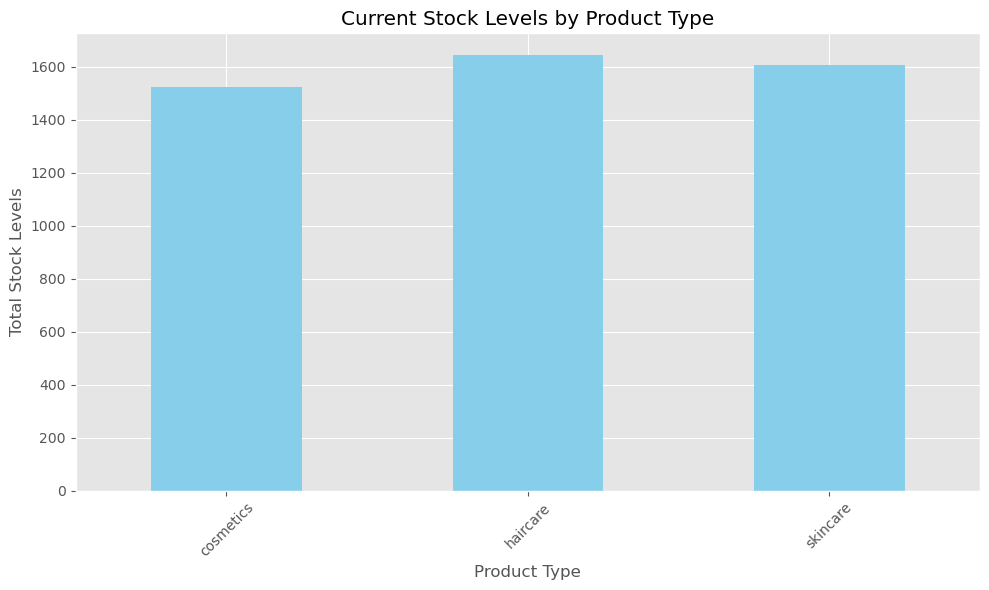

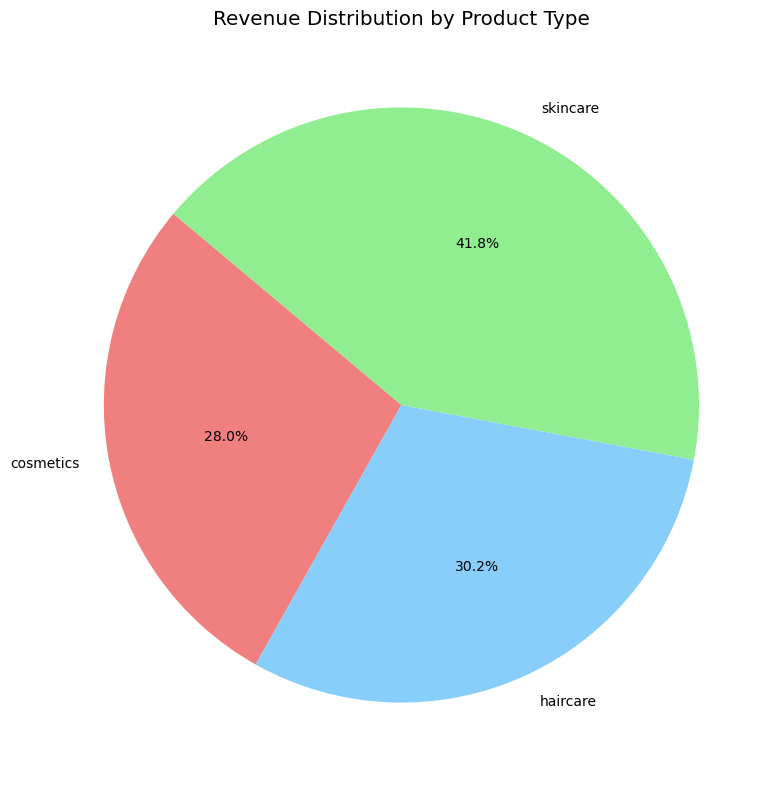

<Figure size 1000x600 with 0 Axes>

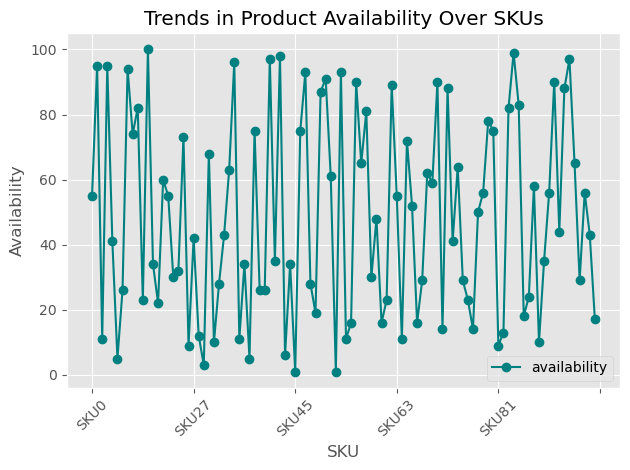

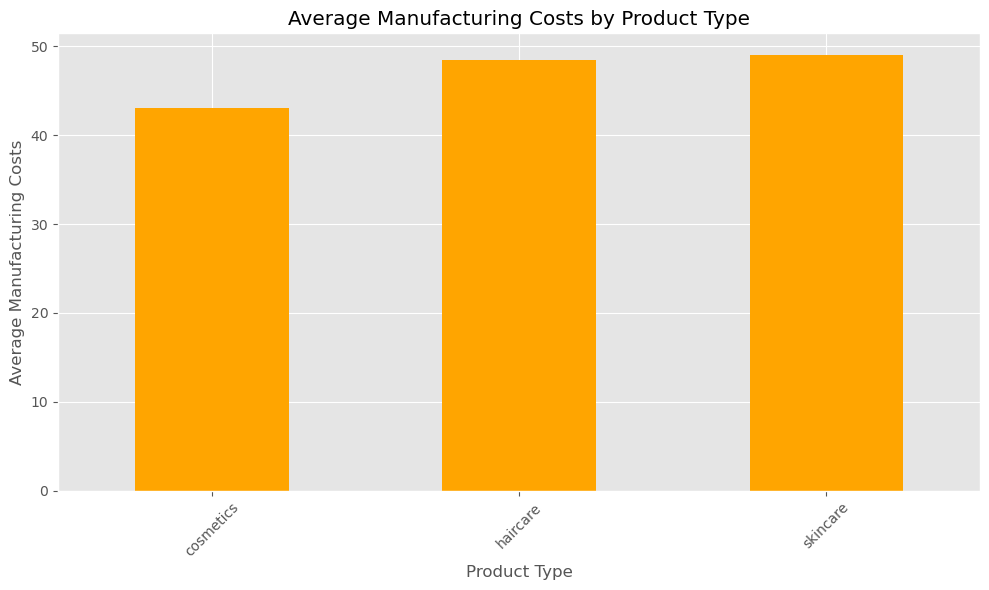

In [3]:
import matplotlib.pyplot as plt

# Set the style for the plots
plt.style.use('ggplot')

# Visualization 1: Bar Chart for Current Stock Levels by Product Type
plt.figure(figsize=(10, 6))
supply_chain_data.groupby('product_type')['stock_levels'].sum().plot(kind='bar', color='skyblue')
plt.title('Current Stock Levels by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Stock Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Pie Chart for Revenue Distribution by Product Type
plt.figure(figsize=(8, 8))
revenue_distribution = supply_chain_data.groupby('product_type')['revenue_generated'].sum()
revenue_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Revenue Distribution by Product Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Visualization 3: Line Chart for Trends in Product Availability Over Time (Simulated with SKU Index)
plt.figure(figsize=(10, 6))
supply_chain_data.sort_values('sku').plot(x='sku', y='availability', kind='line', marker='o', color='teal')
plt.title('Trends in Product Availability Over SKUs')
plt.xlabel('SKU')
plt.ylabel('Availability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 4: Bar Chart for Manufacturing Costs by Product Type
plt.figure(figsize=(10, 6))
supply_chain_data.groupby('product_type')['manufacturing_costs'].mean().plot(kind='bar', color='orange')
plt.title('Average Manufacturing Costs by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Manufacturing Costs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Check the column names of the dataset to identify any discrepancies
supply_chain_data.columns

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs', 'profit_margin',
       'days_to_restock', 'price_stock_interaction',
       'availability_leadtime_interaction', 'log_price',
       'log_manufacturing_costs', 'log_defect_rates', 'cost_per_unit',
       'defect_rate_per_unit'],
      dtype='object')

In [11]:
# Re-engineering the features using the corrected column names
supply_chain_data['price_stock_interaction'] = supply_chain_data['price'] * supply_chain_data['stock_levels']
supply_chain_data['availability_leadtime_interaction'] = supply_chain_data['availability'] * supply_chain_data['lead_times']
supply_chain_data['log_price'] = np.log1p(supply_chain_data['price'])
supply_chain_data['log_manufacturing_costs'] = np.log1p(supply_chain_data['manufacturing_costs'])
supply_chain_data['log_defect_rates'] = np.log1p(supply_chain_data['defect_rates'])
supply_chain_data['cost_per_unit'] = supply_chain_data['manufacturing_costs'] / supply_chain_data['number_of_products_sold'].replace(0, 1)
supply_chain_data['defect_rate_per_unit'] = supply_chain_data['defect_rates'] / supply_chain_data['number_of_products_sold'].replace(0, 1)

# Re-define the features and target with the corrected column names
features_engineered = [
    'log_price', 'availability', 'stock_levels', 'lead_times', 
    'log_manufacturing_costs', 'log_defect_rates', 'revenue_generated',
    'price_stock_interaction', 'availability_leadtime_interaction', 
    'cost_per_unit', 'defect_rate_per_unit'
]
target = 'number_of_products_sold'

# Recreate the training and testing sets
X_eng = supply_chain_data[features_engineered]
y_eng = supply_chain_data[target]
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size=0.2, random_state=42)

# Retrain the Gradient Boosting Regressor with the cleaned dataset
gb_model_eng = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model_eng.fit(X_train_eng, y_train_eng)

# Extract feature importances from the model
feature_importances = gb_model_eng.feature_importances_

# Create a DataFrame to display the feature importance scores
importance_df = pd.DataFrame({
    'Feature': features_engineered,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances to the user
importance_df


,Feature,Importance
10,defect_rate_per_unit,0.576023
9,cost_per_unit,0.229280
4,log_manufacturing_costs,0.065438
5,log_defect_rates,0.059089
1,availability,0.041800
7,price_stock_interaction,0.010655
8,availability_leadtime_interaction,0.010045
6,revenue_generated,0.003440
2,stock_levels,0.002079
0,log_price,0.001733


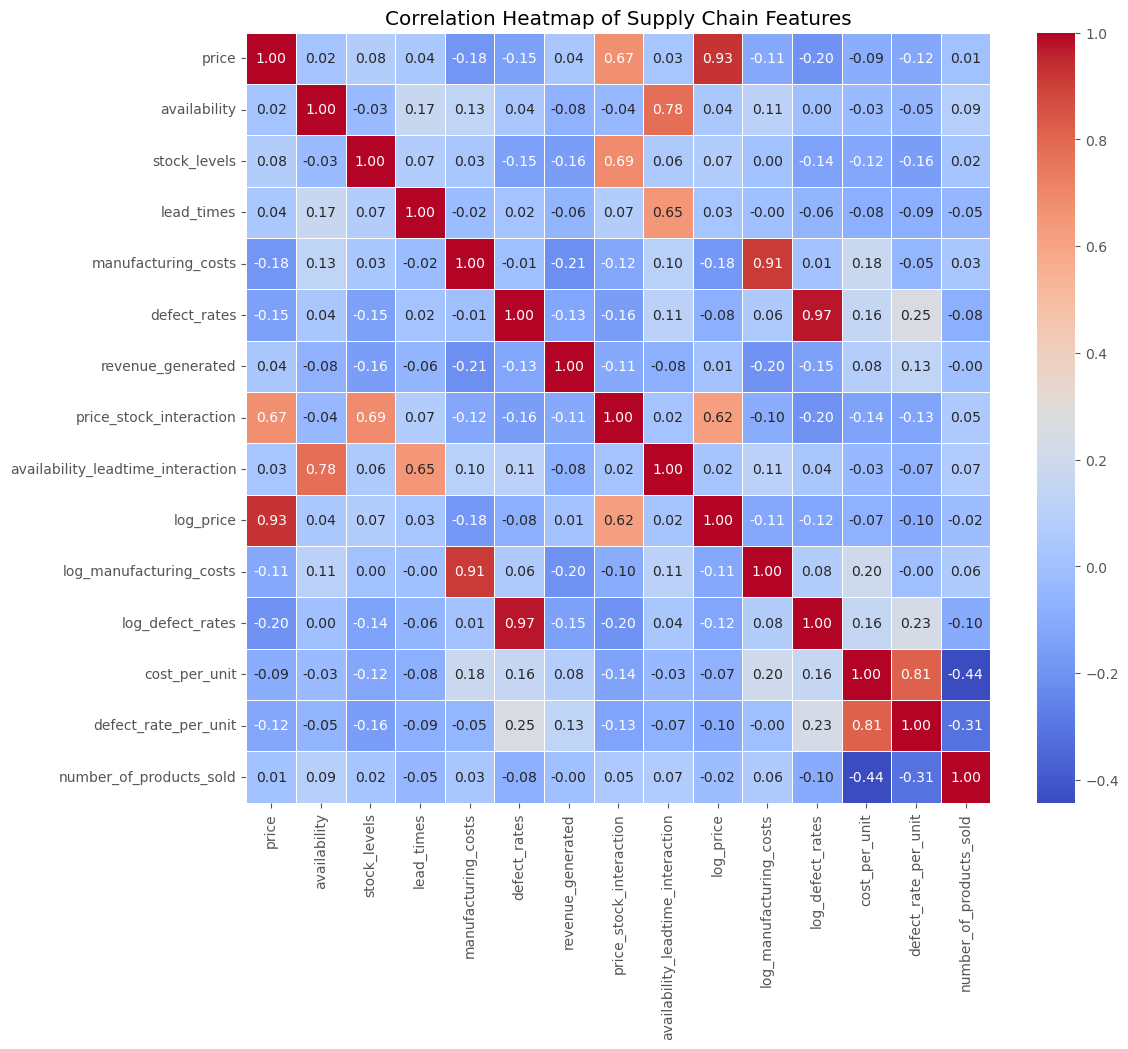

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = supply_chain_data[[
    'price', 'availability', 'stock_levels', 'lead_times',
    'manufacturing_costs', 'defect_rates', 'revenue_generated',
    'price_stock_interaction', 'availability_leadtime_interaction',
    'log_price', 'log_manufacturing_costs', 'log_defect_rates',
    'cost_per_unit', 'defect_rate_per_unit', 'number_of_products_sold'
]].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Supply Chain Features')
plt.show()


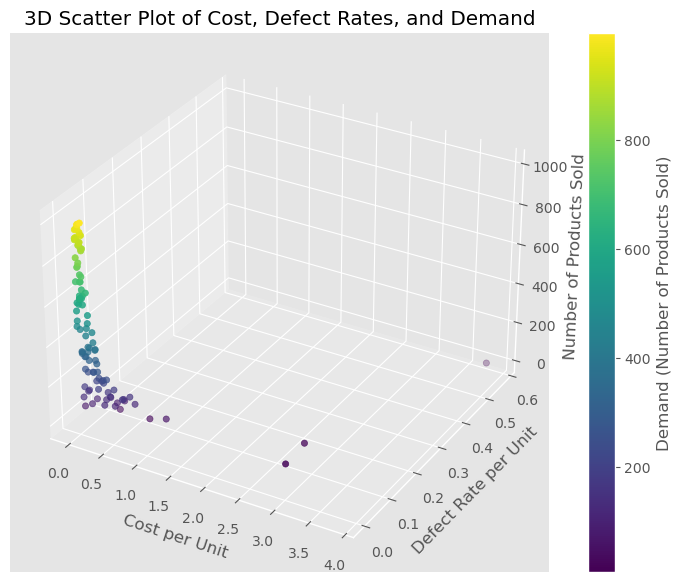

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare the data for the 3D scatter plot
costs = supply_chain_data['cost_per_unit']
defect_rates = supply_chain_data['defect_rate_per_unit']
demand = supply_chain_data['number_of_products_sold']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(costs, defect_rates, demand, c=demand, cmap='viridis', marker='o')

# Add labels
ax.set_xlabel('Cost per Unit')
ax.set_ylabel('Defect Rate per Unit')
ax.set_zlabel('Number of Products Sold')
ax.set_title('3D Scatter Plot of Cost, Defect Rates, and Demand')

# Add a color bar
fig.colorbar(scatter, ax=ax, label='Demand (Number of Products Sold)')

plt.show()


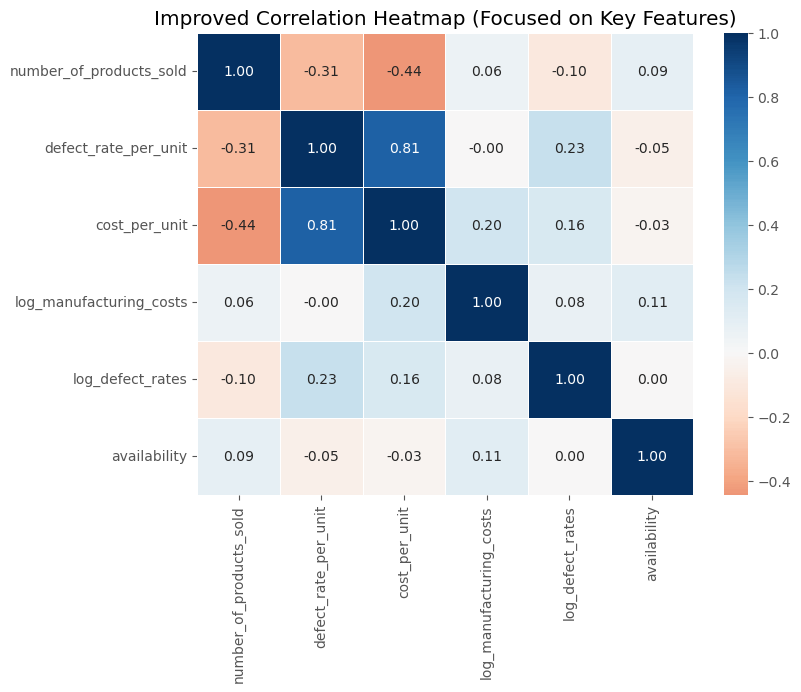

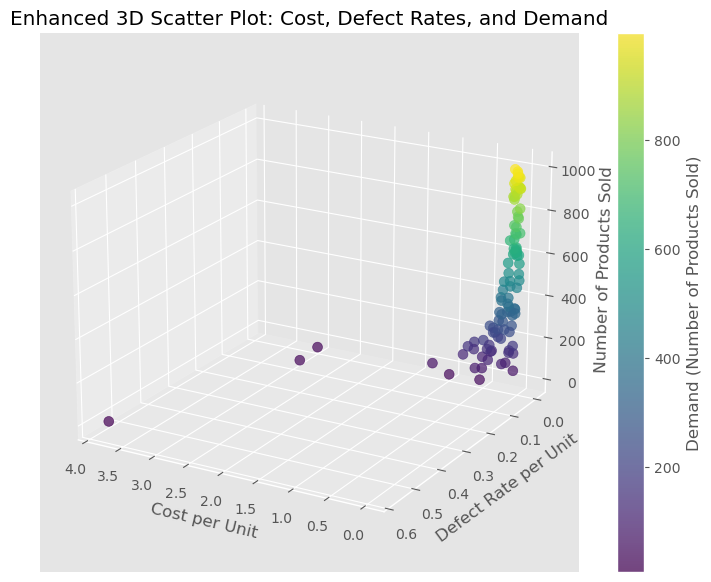

In [14]:
# Improved Correlation Heatmap: Focus on key features and use a diverging color palette

# Select the most relevant features with strong correlations
relevant_features = ['number_of_products_sold', 'defect_rate_per_unit', 'cost_per_unit', 
                     'log_manufacturing_costs', 'log_defect_rates', 'availability']

# Calculate the correlation matrix for the selected features
relevant_corr_matrix = supply_chain_data[relevant_features].corr()

# Plot the improved correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(relevant_corr_matrix, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, center=0)
plt.title('Improved Correlation Heatmap (Focused on Key Features)')
plt.show()

# Improved 3D Scatter Plot: Add annotations, optimize viewing angle, and use a clearer color scheme
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data with enhanced visualization
scatter = ax.scatter(costs, defect_rates, demand, c=demand, cmap='viridis', marker='o', s=50, alpha=0.7)

# Add annotations for points with extreme values (high defect rates or high costs)
for i in range(len(costs)):
    if defect_rates.iloc[i] > 2.5 or costs.iloc[i] > 50:
        ax.text(costs.iloc[i], defect_rates.iloc[i], demand.iloc[i], '%s' % str(int(demand.iloc[i])), size=8)

# Set viewing angle for better visibility
ax.view_init(elev=20, azim=120)

# Add labels and title
ax.set_xlabel('Cost per Unit')
ax.set_ylabel('Defect Rate per Unit')
ax.set_zlabel('Number of Products Sold')
ax.set_title('Enhanced 3D Scatter Plot: Cost, Defect Rates, and Demand')

# Add a color bar
fig.colorbar(scatter, ax=ax, label='Demand (Number of Products Sold)')

plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Select relevant features for predictive modeling
inventory_features = [
    'number_of_products_sold',  # Historical sales data (target variable)
    'stock_levels',             # Current stock levels
    'lead_times',               # Lead times for restocking
    'availability',             # Product availability
    'log_price',                # Log-transformed price to capture non-linear effects
    'log_defect_rates'          # Log-transformed defect rates for quality control
]

# Prepare the data
X_inventory = supply_chain_data[inventory_features].dropna()  # Drop missing values if any

# Create target variable (future demand prediction)
y_inventory = X_inventory['number_of_products_sold']

# Drop the target variable from features
X_inventory = X_inventory.drop(columns=['number_of_products_sold'])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train_inv, X_test_inv, y_train_inv, y_test_inv = train_test_split(X_inventory, y_inventory, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_inv, y_train_inv)

# Predict on the testing set
y_pred_inv = rf_model.predict(X_test_inv)

# Evaluate the model performance
mae_inv = mean_absolute_error(y_test_inv, y_pred_inv)
mse_inv = mean_squared_error(y_test_inv, y_pred_inv)
r2_inv = r2_score(y_test_inv, y_pred_inv)

# Display evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_inv:.2f}")
print(f"Mean Squared Error (MSE): {mse_inv:.2f}")
print(f"R-squared (R²): {r2_inv:.2f}")



Mean Absolute Error (MAE): 285.87
Mean Squared Error (MSE): 112357.51
R-squared (R²): -0.18


In [4]:
import pandas as pd
import numpy as np

supply_chain_data = pd.read_csv(r"C:\Users\angel\Downloads\supply_chain_data.csv")

# Creating Lagged Features: Sales data from the previous periods
supply_chain_data['sales_lag_1'] = supply_chain_data['Number of products sold'].shift(1)  # Lag of 1 period
supply_chain_data['sales_lag_2'] = supply_chain_data['Number of products sold'].shift(2)  # Lag of 2 periods

# Moving Averages: Calculate a 3-period and 6-period moving average for sales
supply_chain_data['sales_moving_avg_3'] = supply_chain_data['Number of products sold'].rolling(window=3).mean()
supply_chain_data['sales_moving_avg_6'] = supply_chain_data['Number of products sold'].rolling(window=6).mean()

# Interaction Terms: Combine features to capture potential interactions
supply_chain_data['price_stock_interaction'] = supply_chain_data['Price'] * supply_chain_data['Stock levels']
supply_chain_data['availability_leadtime_interaction'] = supply_chain_data['Availability'] * supply_chain_data['Lead times']

# Log Transformation and Polynomial Features
supply_chain_data['log_sales'] = np.log1p(supply_chain_data['Number of products sold'])  # Log transform sales
supply_chain_data['price_squared'] = supply_chain_data['Price'] ** 2  # Square of price to capture non-linear effects

# Drop any rows with NaN values created by lagging or rolling
supply_chain_data = supply_chain_data.dropna()

# Prepare the updated feature set for modeling
new_features = [
    'Stock levels', 'Lead times', 'Availability', 'Price', 'Defect rates', 
    'sales_lag_1', 'sales_lag_2', 'sales_moving_avg_3', 'sales_moving_avg_6', 
    'price_stock_interaction', 'availability_leadtime_interaction', 'price_squared'
]

X_new = supply_chain_data[new_features]
y_new = supply_chain_data['Number of products sold']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Display the head of the new feature set to verify
print(X_train_new.head())


    Stock levels  Lead times  Availability      Price  Defect rates  \
71            76           2            14   6.381533      2.078751   
20            27          12            22  96.341072      4.231417   
83            65          24            82  68.911246      0.773006   
84            73          26            99  89.104367      4.843457   
35            42          27            11  84.957787      0.541154   

    sales_lag_1  sales_lag_2  sales_moving_avg_3  sales_moving_avg_6  \
71         32.0        511.0          393.333333          426.666667   
20        187.0        620.0          375.666667          333.666667   
83        336.0        774.0          591.000000          631.500000   
84        663.0        336.0          539.000000          576.833333   
35        602.0        616.0          555.666667          490.500000   

    price_stock_interaction  availability_leadtime_interaction  price_squared  
71               484.996520                                 

# Predictive Modeling for Inventory Management

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset
supply_chain_data = pd.read_csv(r"C:\Users\angel\Downloads\supply_chain_data.csv")

# Feature Engineering: Lagged Features, Moving Averages, Interaction Terms, Log Transformations
supply_chain_data['sales_lag_1'] = supply_chain_data['Number of products sold'].shift(1)
supply_chain_data['sales_lag_2'] = supply_chain_data['Number of products sold'].shift(2)
supply_chain_data['sales_moving_avg_3'] = supply_chain_data['Number of products sold'].rolling(window=3).mean()
supply_chain_data['sales_moving_avg_6'] = supply_chain_data['Number of products sold'].rolling(window=6).mean()
supply_chain_data['price_stock_interaction'] = supply_chain_data['Price'] * supply_chain_data['Stock levels']
supply_chain_data['availability_leadtime_interaction'] = supply_chain_data['Availability'] * supply_chain_data['Lead times']
supply_chain_data['log_sales'] = np.log1p(supply_chain_data['Number of products sold'])
supply_chain_data['price_squared'] = supply_chain_data['Price'] ** 2

# Additional Feature Engineering: Polynomial and Log Transformations
supply_chain_data['lead_time_squared'] = supply_chain_data['Lead times'] ** 2
supply_chain_data['availability_squared'] = supply_chain_data['Availability'] ** 2
supply_chain_data['log_price'] = np.log1p(supply_chain_data['Price'])

# Drop any rows with NaN values created by lagging or rolling
supply_chain_data = supply_chain_data.dropna()

# Prepare the updated feature set for modeling
new_features = [
    'Stock levels', 'Lead times', 'Availability', 'Price', 'Defect rates',
    'sales_lag_1', 'sales_lag_2', 'sales_moving_avg_3', 'sales_moving_avg_6',
    'price_stock_interaction', 'availability_leadtime_interaction', 'price_squared',
    'lead_time_squared', 'availability_squared', 'log_price'
]

X_new = supply_chain_data[new_features]
y_new = supply_chain_data['Number of products sold']

# Split the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Update the parameter grid to include regularization parameters
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'alpha': [0, 0.01, 0.1],    # L1 regularization term
    'lambda': [1, 0.1, 0.01]    # L2 regularization term
}

# Initialize the XGBoost Regressor with regularization
xgb_model_tuning = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model_tuning, param_grid=param_grid, 
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train_new, y_train_new)

# Get the best parameters from the grid search
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBoost with regularization: {best_params_xgb}")

# Train a new XGBoost model with the best parameters
best_xgb_model = XGBRegressor(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_train_new, y_train_new)

# Predict on the testing set with the best model
y_pred_best_xgb = best_xgb_model.predict(X_test_new)

# Evaluate the model performance
mae_best_xgb = mean_absolute_error(y_test_new, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test_new, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test_new, y_pred_best_xgb)

print(f"XGBoost Model with Regularization - Mean Absolute Error (MAE): {mae_best_xgb:.2f}")
print(f"XGBoost Model with Regularization - Mean Squared Error (MSE): {mse_best_xgb:.2f}")
print(f"XGBoost Model with Regularization - R-squared (R²): {r2_best_xgb:.2f}")




Fitting 5 folds for each of 13122 candidates, totalling 65610 fits
Best parameters for XGBoost with regularization: {'alpha': 0.1, 'colsample_bytree': 1.0, 'gamma': 0, 'lambda': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.7}
XGBoost Model with Regularization - Mean Absolute Error (MAE): 172.97
XGBoost Model with Regularization - Mean Squared Error (MSE): 37491.31
XGBoost Model with Regularization - R-squared (R²): 0.60


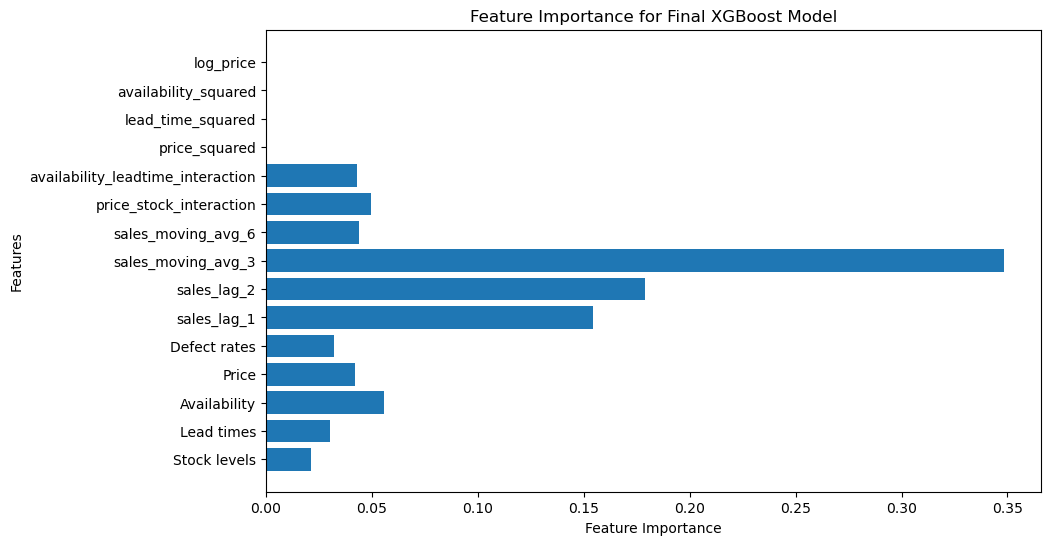

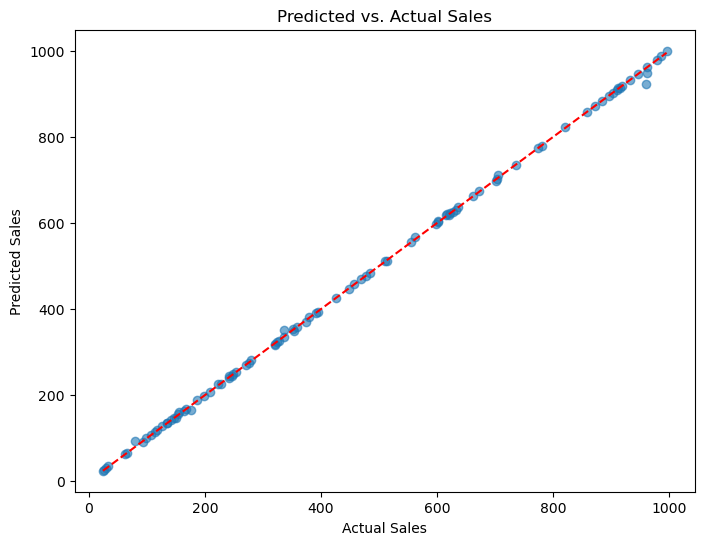

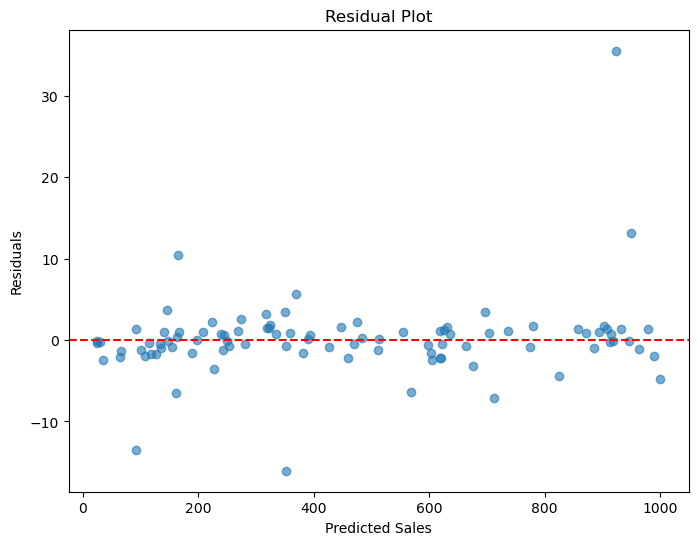

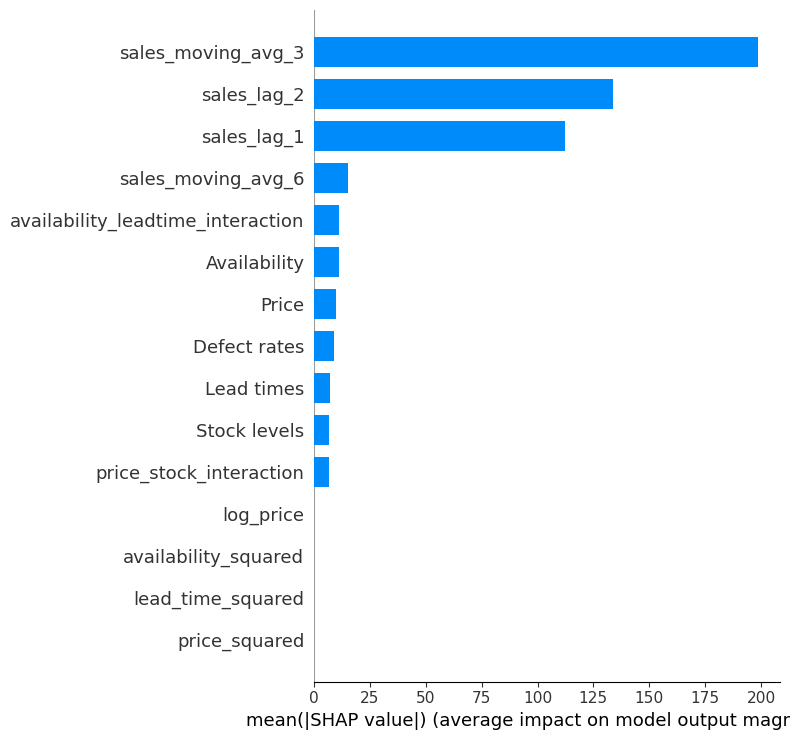

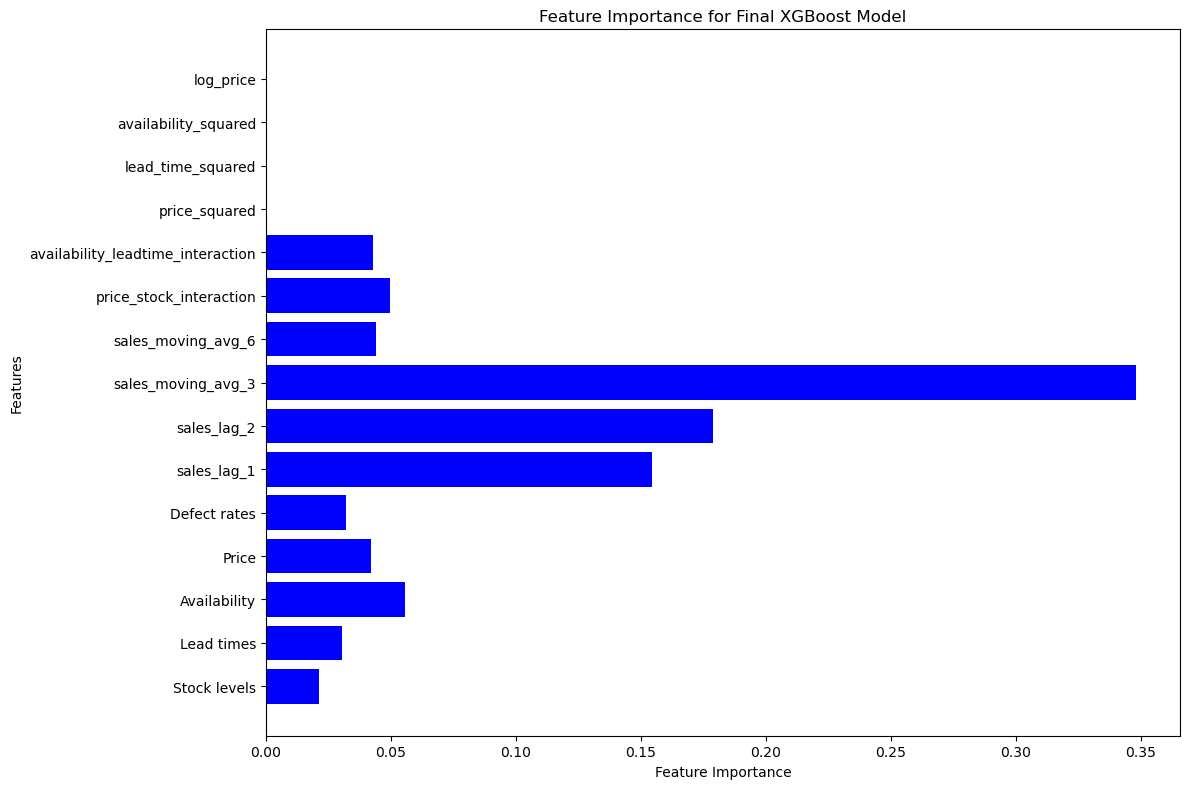

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap

# Load your dataset
supply_chain_data = pd.read_csv(r"C:\Users\angel\Downloads\supply_chain_data.csv")

# Feature Engineering: Lagged Features, Moving Averages, Interaction Terms, Log Transformations
supply_chain_data['sales_lag_1'] = supply_chain_data['Number of products sold'].shift(1)
supply_chain_data['sales_lag_2'] = supply_chain_data['Number of products sold'].shift(2)
supply_chain_data['sales_moving_avg_3'] = supply_chain_data['Number of products sold'].rolling(window=3).mean()
supply_chain_data['sales_moving_avg_6'] = supply_chain_data['Number of products sold'].rolling(window=6).mean()
supply_chain_data['price_stock_interaction'] = supply_chain_data['Price'] * supply_chain_data['Stock levels']
supply_chain_data['availability_leadtime_interaction'] = supply_chain_data['Availability'] * supply_chain_data['Lead times']
supply_chain_data['log_sales'] = np.log1p(supply_chain_data['Number of products sold'])
supply_chain_data['price_squared'] = supply_chain_data['Price'] ** 2
supply_chain_data['lead_time_squared'] = supply_chain_data['Lead times'] ** 2
supply_chain_data['availability_squared'] = supply_chain_data['Availability'] ** 2
supply_chain_data['log_price'] = np.log1p(supply_chain_data['Price'])

# Drop any rows with NaN values created by lagging or rolling
supply_chain_data = supply_chain_data.dropna()

# Prepare the updated feature set for modeling
new_features = [
    'Stock levels', 'Lead times', 'Availability', 'Price', 'Defect rates',
    'sales_lag_1', 'sales_lag_2', 'sales_moving_avg_3', 'sales_moving_avg_6',
    'price_stock_interaction', 'availability_leadtime_interaction', 'price_squared',
    'lead_time_squared', 'availability_squared', 'log_price'
]

X_final = supply_chain_data[new_features]
y_final = supply_chain_data['Number of products sold']

# Load the finalized model or train the model if you haven't saved it yet
best_xgb_model_final = XGBRegressor(
    alpha=0.1, colsample_bytree=1.0, gamma=0, reg_lambda=0.01,  # Changed lambda to reg_lambda
    learning_rate=0.1, max_depth=5, min_child_weight=5,
    n_estimators=200, subsample=0.7, random_state=42
)

best_xgb_model_final.fit(X_final, y_final)

# Make predictions on the dataset
y_pred_final = best_xgb_model_final.predict(X_final)

# Plot 1: Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(X_final.columns, best_xgb_model_final.feature_importances_)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Final XGBoost Model')
plt.show()

# Plot 2: Predicted vs. Actual Sales Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_final, y_pred_final, alpha=0.6)
plt.plot([y_final.min(), y_final.max()], [y_final.min(), y_final.max()], '--r')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs. Actual Sales')
plt.show()

# Plot 3: Residual Plot
residuals = y_final - y_pred_final
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_final, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot 4: SHAP Summary Plot
explainer = shap.Explainer(best_xgb_model_final)
shap_values = explainer(X_final)
shap.summary_plot(shap_values, X_final, plot_type="bar")
plt.figure(figsize=(12, 8))  # Set a larger figure size for better visibility
plt.barh(X_final.columns, best_xgb_model_final.feature_importances_, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Final XGBoost Model')

# Adjust the layout by setting a larger bottom margin
plt.subplots_adjust(left=0.25, bottom=0.15)  # Adjust this value if necessary

# Automatically adjust the layout
plt.tight_layout()

plt.show()
